<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/Updated_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 85% 56.0M/66.0M [00:00<00:00, 196MB/s]
100% 66.0M/66.0M [00:00<00:00, 187MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


#Import necessary libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [8]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction



In [13]:
# distribution of legit transactions & fraudulent transactions
credit_card_data.shape

(284807, 31)

In [15]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [16]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [17]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [20]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [21]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152731,97450.0,0.129341,0.265736,1.315660,-0.672812,0.033414,0.591842,-0.328251,0.282934,1.739541,...,-0.020909,0.189308,0.090617,0.311638,-0.787730,0.338850,-0.009642,0.002011,15.95,0
50279,44419.0,-1.850197,-0.059949,2.246166,0.986533,-0.305455,1.461981,-0.108060,-0.358717,-0.113765,...,0.934730,0.790787,0.175939,-0.263111,0.288114,-0.058318,0.264711,0.031978,156.09,0
234595,148039.0,0.304424,1.588066,-0.398412,2.671509,1.718976,1.054921,-0.040188,-0.458614,-1.322318,...,0.446121,-1.263330,-0.039543,-0.543031,-0.149479,-0.512877,0.300169,0.394459,9.84,0
74832,55778.0,-0.646655,-0.982266,0.654012,-3.553242,2.036510,3.114303,-0.733081,0.694774,-2.478265,...,-0.465334,-1.228732,-0.037485,0.920402,0.287862,-0.572636,-0.129641,-0.151162,24.95,0
59636,48930.0,-0.121291,0.794763,1.171759,0.670602,0.031727,-0.824689,0.632303,-0.002652,-0.290040,...,0.208627,0.599003,0.037027,0.578658,-0.529764,-0.476128,0.128177,0.097941,5.00,0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [24]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94961.441057,-0.013412,0.000132,-0.015816,-0.012642,0.111958,0.094419,0.010921,0.029079,0.049719,...,0.044897,0.000346,-0.005779,-0.001049,0.048282,0.055672,0.005385,0.001967,-0.014075,92.868516
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#Splitting the data into Features & Targets

In [26]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [27]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
152731   97450.0  0.129341  0.265736  1.315660 -0.672812  0.033414  0.591842   
50279    44419.0 -1.850197 -0.059949  2.246166  0.986533 -0.305455  1.461981   
234595  148039.0  0.304424  1.588066 -0.398412  2.671509  1.718976  1.054921   
74832    55778.0 -0.646655 -0.982266  0.654012 -3.553242  2.036510  3.114303   
59636    48930.0 -0.121291  0.794763  1.171759  0.670602  0.031727 -0.824689   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [28]:
print(Y)

152731    0
50279     0
234595    0
74832     0
59636     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


#Split the data into Training data & Testing Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


#set up model

Logistic Regression

Decision Trees

Random Forest

Gradient Boosting Machines (GBM)

Support Vector Machines (SVM)

K-Nearest Neighbors (KNN)

In [32]:
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)

model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC.fit(X_train, Y_train)

model_XGB = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_XGB.fit(X_train, Y_train)

model_SVC = SVC(kernel='rbf', random_state=42)
model_SVC.fit(X_train, Y_train)

model_KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

#Model Training

**ACCURACY AND ROC_AUC SCORE LOGISTIC REGRESSION**

In [34]:
prediction_test_LR = model_LR.predict(X_test)
prediction_test_LR_roc_auc = model_LR.predict_proba(X_test)

In [36]:
accuracy_LR = accuracy_score(Y_test, prediction_test_LR)
roc_auc_LR = roc_auc_score(Y_test, prediction_test_LR_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy LOGISTIC REGRESSION: {accuracy_LR * 100:.2f}%')
print(f'ROC AUC Score LOGISTIC REGRESSION: {roc_auc_LR:.2f}')

Accuracy LOGISTIC REGRESSION: 91.37%
ROC AUC Score LOGISTIC REGRESSION: 0.97


**CONFUSION MATRIX AND CLASSIFICATION REPORT LOGISTIC REGRESSION**

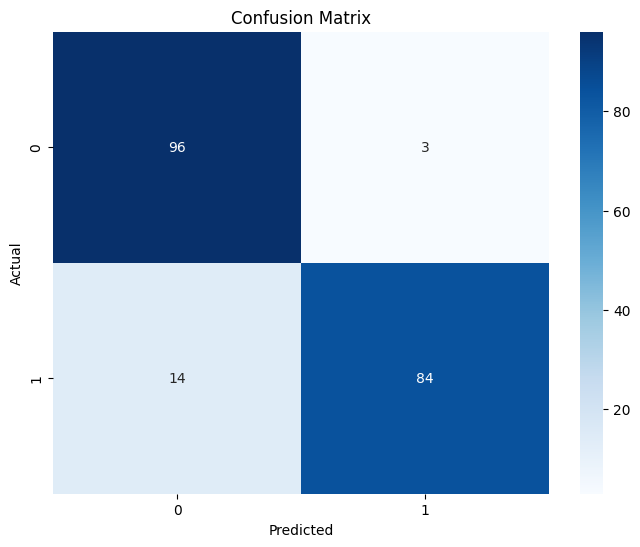

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        99
           1       0.97      0.86      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [38]:
# Confusion matrix
conf_matrix_LR = confusion_matrix(Y_test, prediction_test_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(Y_test, prediction_test_LR)
print('Classification Report:')
print(class_report)

**ACCURACY DECISION TREE CLASSIFIER**

In [39]:
prediction_test_DTC = model_DTC.predict(X_test)
prediction_test_DTC_roc_auc = model_DTC.predict_proba(X_test)

In [41]:
accuracy_DTC = accuracy_score(Y_test, prediction_test_DTC)
roc_auc_DTC = roc_auc_score(Y_test, prediction_test_DTC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy DECISION TREE CLASSIFIER: {accuracy_DTC * 100:.2f}%')
print(f'ROC AUC Score DECISION TREE CLASSIFIER: {roc_auc_DTC:.2f}')


Accuracy DECISION TREE CLASSIFIER: 90.86%
ROC AUC Score DECISION TREE CLASSIFIER: 0.91


**CONFUSION MATRIX AND CLASSIFICATION REPORT DECISION TREE CLASSIFIER**

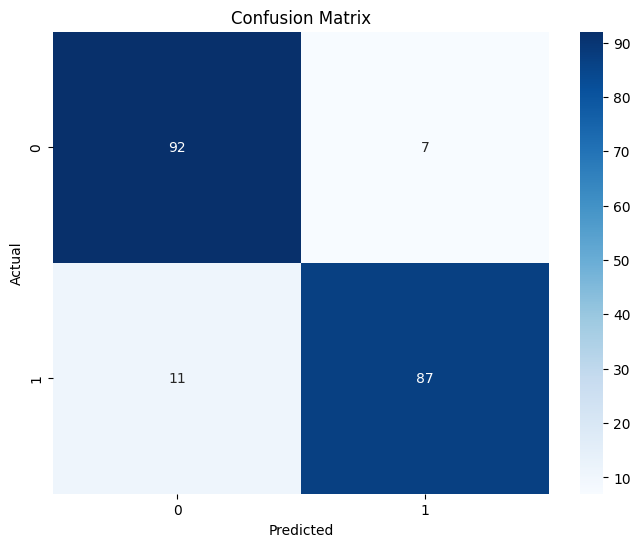

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        99
           1       0.93      0.89      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [44]:
# Confusion matrix
conf_matrix_DTC = confusion_matrix(Y_test, prediction_test_DTC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_DTC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(Y_test, prediction_test_DTC)
print('Classification Report:')
print(class_report)

**ACCURACY RANDOM FOREST CLASSIFIER**

In [45]:
prediction_test_RFC = model_RFC.predict(X_test)
prediction_test_RFC_roc_auc = model_RFC.predict_proba(X_test)

In [47]:
accuracy_RFC = accuracy_score(Y_test, prediction_test_RFC)
roc_auc_RFC = roc_auc_score(Y_test, prediction_test_RFC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy RANDOM FOREST CLASSIFIER: {accuracy_RFC * 100:.2f}%')
print(f'ROC AUC Score RANDOM FOREST CLASSIFIER: {roc_auc_RFC:.2f}')

Accuracy RANDOM FOREST CLASSIFIER: 92.89%
ROC AUC Score RANDOM FOREST CLASSIFIER: 0.97


**CONFUSION MATRIX AND CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER**

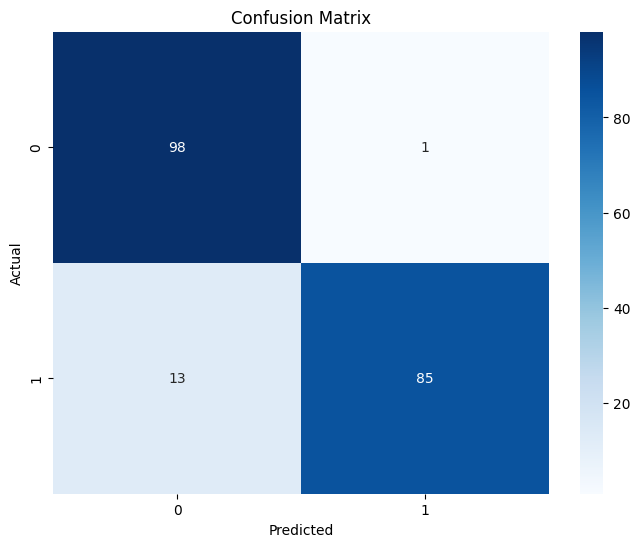

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.87      0.92        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [49]:
# Confusion matrix
conf_matrix_RFC = confusion_matrix(Y_test, prediction_test_RFC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RFC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(Y_test, prediction_test_RFC)
print('Classification Report:')
print(class_report)


**ACCURACY GradientBoostingClassifier**

In [50]:
prediction_test_XGB = model_XGB.predict(X_test)
prediction_test_XGB_roc_auc = model_XGB.predict_proba(X_test)


In [52]:
accuracy_XGB = accuracy_score(Y_test, prediction_test_XGB)
roc_auc_XGB = roc_auc_score(Y_test, prediction_test_XGB_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy XGBClassifier: {accuracy_XGB * 100:.2f}%')
print(f'ROC AUC Score XGBClassifier: {roc_auc_XGB:.2f}')

Accuracy XGBClassifier: 92.39%
ROC AUC Score XGBClassifier: 0.98


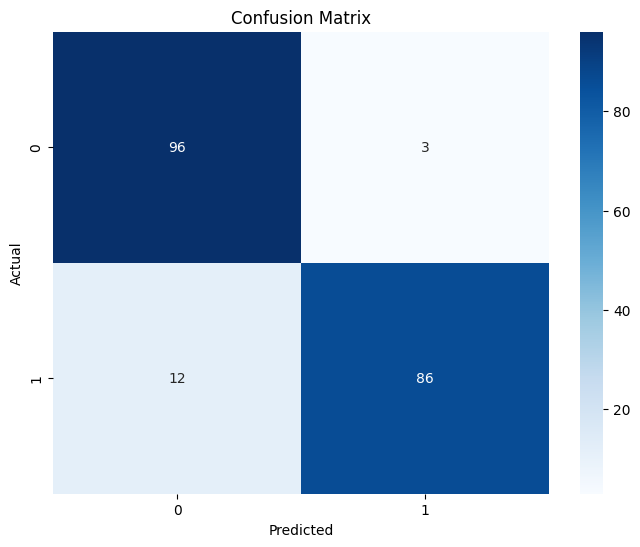

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [55]:
# Confusion matrix
conf_matrix_XGBC = confusion_matrix(Y_test, prediction_test_XGB)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XGBC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(Y_test, prediction_test_XGB)
print('Classification Report:')
print(class_report)

**ACCURACY SUPPORT VECTOR MACHINES**

In [57]:
prediction_test_SVC = model_SVC.predict(X_test)


In [59]:
accuracy_SVC = accuracy_score(Y_test, prediction_test_SVC)
#roc_auc_SVC = roc_auc_score(y_test, prediction_test_SVC_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy SUPPORT VECTOR MACHINES: {accuracy_SVC * 100:.2f}%')
#print(f'ROC AUC Score SUPPORT VECTOR MACHINES: {roc_auc_SVC:.2f}')

Accuracy SUPPORT VECTOR MACHINES: 52.28%


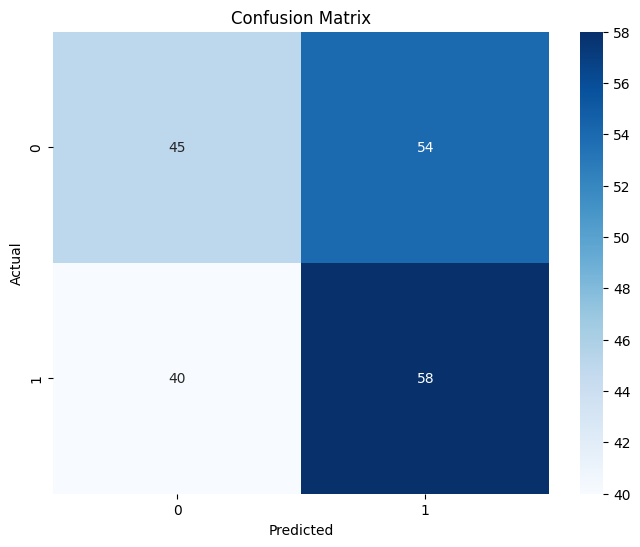

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.45      0.49        99
           1       0.52      0.59      0.55        98

    accuracy                           0.52       197
   macro avg       0.52      0.52      0.52       197
weighted avg       0.52      0.52      0.52       197



In [60]:
# Confusion matrix
conf_matrix_SVC = confusion_matrix(Y_test, prediction_test_SVC)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_SVC, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(Y_test, prediction_test_SVC)
print('Classification Report:')
print(class_report)

**ACCURACY KNeighborsClassifier**

In [62]:
prediction_test_KNN = model_KNN.predict(X_test)
prediction_test_KNN_roc_auc = model_KNN.predict_proba(X_test)
accuracy_KNN = accuracy_score(Y_test, prediction_test_KNN)
roc_auc_KNN = roc_auc_score(Y_test, prediction_test_KNN_roc_auc[:, 1], multi_class='ovr')
print(f'Accuracy KNeighborsClassifier: {accuracy_KNN * 100:.2f}%')
print(f'ROC AUC Score KNeighborsClassifier: {roc_auc_KNN:.2f}')

Accuracy KNeighborsClassifier: 56.35%
ROC AUC Score KNeighborsClassifier: 0.61


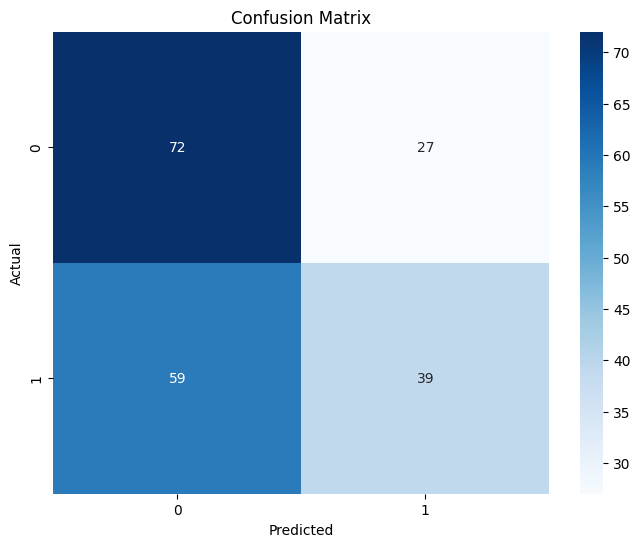

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.73      0.63        99
           1       0.59      0.40      0.48        98

    accuracy                           0.56       197
   macro avg       0.57      0.56      0.55       197
weighted avg       0.57      0.56      0.55       197



In [63]:
# Confusion matrix
conf_matrix_KNN = confusion_matrix(Y_test, prediction_test_KNN)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
class_report = classification_report(Y_test, prediction_test_KNN)
print('Classification Report:')
print(class_report)